<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/Week9_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images.shape
test_images.shape

(10000, 28, 28)

So nay la:  5


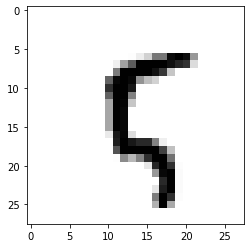

In [14]:
import matplotlib.pyplot as plt
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('So nay la: ', train_labels[100])

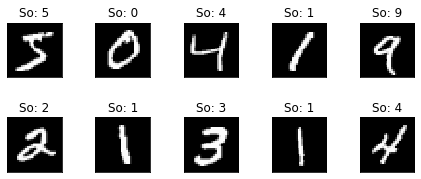

In [12]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation='none')
  plt.title('So: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [56]:
from keras.models import Sequential
from keras.layers import Dense

# create a sequential model
model = Sequential()

# add a dense layer with 512 units, input shape (28, 28), and relu activation function
model.add(Dense(512, input_shape=(28,28), activation='relu'))

# add another dense layer with 10 units and softmax activation function
model.add(Dense(10, activation='softmax'))

# print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 28, 512)           14848     
                                                                 
 dense_8 (Dense)             (None, 28, 10)            5130      
                                                                 
Total params: 19,978
Trainable params: 19,978
Non-trainable params: 0
_________________________________________________________________


In [57]:
train_images = train_images.reshape((60000,28*28))  # Định dạng ảnh 2 chiều -> 1 chiều
train_images = train_images.astype('float32')/255   # Chuyển đổi số nguyên sang số thực

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [62]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [67]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images.reshape((10000, 784)), test_labels)
print('test accuracy:', test_acc)
print('test loss:', test_loss)


Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 2.9189e-04 - accuracy: 1.0000
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 2.6066e-04 - accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 2.3462e-04 - accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 2.1522e-04 - accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 2.0099e-04 - accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 1.8594e-04 - accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 1.7517e-04 - accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6414e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 1.5479e-04 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 4

In [ ]:
model.save('model1.hs')
#model11 = load.model('model1.hs')

#label1 = model11.predict(test_images[10])

In [87]:
# Cifar10
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape
x_test.shape

(10000, 32, 32, 3)

Hinh [1]


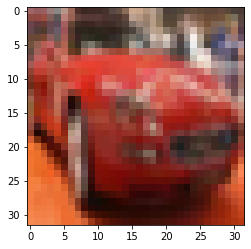

In [93]:
import matplotlib.pyplot as plt
hinh = x_train[5]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('Hinh', y_train[5])

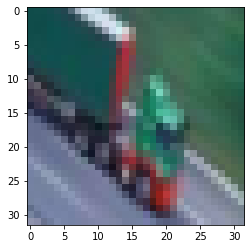

This image is: [9]


In [5]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# load the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# display an image from the dataset
plt.imshow(train_images[50])
plt.show()
print('This image is:', train_labels[50])

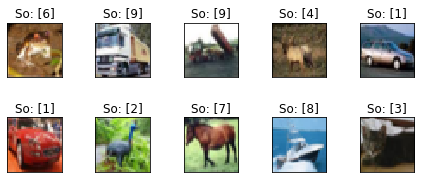

In [11]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation='none')
  plt.title('So: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [16]:
# preprocess the data
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [17]:
# add a virtual layer to the input shape
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [18]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:', test_acc)
print('test loss:', test_loss)

Epoch 1/10
391/391 [==============================] - 9s 21ms/step - loss: 2.2310 - accuracy: 0.2629
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 1.7989 - accuracy: 0.3567
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 1.7174 - accuracy: 0.3875
Epoch 4/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6564 - accuracy: 0.4094
Epoch 5/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6178 - accuracy: 0.4253
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 1.5840 - accuracy: 0.4382
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 1.5561 - accuracy: 0.4470
Epoch 8/10
391/391 [==============================] - 8s 21ms/step - loss: 1.5343 - accuracy: 0.4584
Epoch 9/10
391/391 [==============================] - 8s 21ms/step - loss: 1.5043 - accuracy: 0.4679
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 1.5244 - accurac